In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/roberto/Desktop/steam_reviews.csv')

# -------------------------------------------
#### Part 1: General Information
# -------------------------------------------


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0  app_id                  app_name  review_id  language  \
0           0  292030  The Witcher 3: Wild Hunt   85185598  schinese   
1           1  292030  The Witcher 3: Wild Hunt   85185250  schinese   
2           2  292030  The Witcher 3: Wild Hunt   85185111  schinese   
3           3  292030  The Witcher 3: Wild Hunt   85184605   english   
4           4  292030  The Witcher 3: Wild Hunt   85184287  schinese   

                                              review  timestamp_created  \
0                            不玩此生遗憾，RPG游戏里的天花板，太吸引人了         1611381629   
1                                 拔DIAO无情打桩机--杰洛特!!!         1611381030   
2                                              巫师3NB         1611380800   
3  One of the best RPG's of all time, worthy of a...         1611379970   
4                                                 大作         1611379427   

   timestamp_updated  recommended  votes_helpful  ...  steam_purchase  \
0         16

In [5]:
# Check for data types and missing values
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  aut

In [6]:
# Summary of missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
review                            33748
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64


# -------------------------------------------
#### Part 2: Summary Statistics
# -------------------------------------------


In [7]:
# Display summary statistics for numerical features
numerical_summary = df.describe()
print("\nSummary Statistics for Numerical Features:")
print(numerical_summary)


Summary Statistics for Numerical Features:
         Unnamed: 0        app_id     review_id  timestamp_created  \
count  2.174737e+07  2.174737e+07  2.174737e+07       2.174737e+07   
mean   1.087369e+07  3.928181e+05  5.187500e+07       1.544432e+09   
std    6.277927e+06  2.480977e+05  2.084267e+07       5.812194e+07   
min    0.000000e+00  7.000000e+01  4.300000e+01       1.290198e+09   
25%    5.436844e+06  2.427600e+05  3.639355e+07       1.510223e+09   
50%    1.087369e+07  3.595500e+05  5.384058e+07       1.562446e+09   
75%    1.631053e+07  5.780800e+05  6.928793e+07       1.589696e+09   
max    2.174738e+07  1.291340e+06  8.521867e+07       1.611426e+09   

       timestamp_updated  votes_helpful   votes_funny  weighted_vote_score  \
count       2.174737e+07   2.174737e+07  2.174737e+07         2.174737e+07   
mean        1.547556e+09   4.044689e+05  1.267917e+05         1.654424e-01   
std         5.689899e+07   1.333741e+09  2.333553e+07         2.434006e-01   
min         1

In [8]:
# Display summary statistics for categorical features
categorical_summary = df.describe(include=['object'])
print("\nSummary Statistics for Categorical Features:")
print(categorical_summary)


Summary Statistics for Categorical Features:
                             app_name  language    review
count                        21747371  21747371  21713623
unique                            315        28  16657836
top     PLAYERUNKNOWN'S BATTLEGROUNDS   english      good
freq                          1644255   9635437    106671


# -------------------------------------------
#### Part 3: Distribution of Key Numerical Features
# -------------------------------------------

MemoryError: Unable to allocate 4.36 PiB for an array with shape (613807338874427,) and data type float64

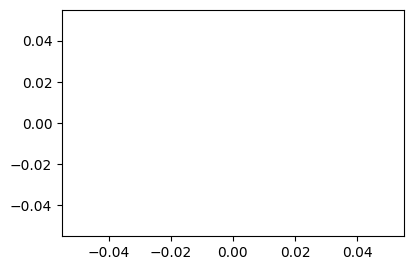

In [9]:
# Plot histograms for main numerical columns
numerical_cols = ['votes_helpful', 'votes_funny', 'weighted_vote_score', 
                  'comment_count', 'author.num_games_owned', 
                  'author.num_reviews', 'author.playtime_forever', 
                  'author.playtime_last_two_weeks', 'author.playtime_at_review']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# -------------------------------------------
#### Part 4: Categorical Feature Analysis
# -------------------------------------------


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/1401491989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='language', order=df['language'].value_counts().index, palette="viridis")


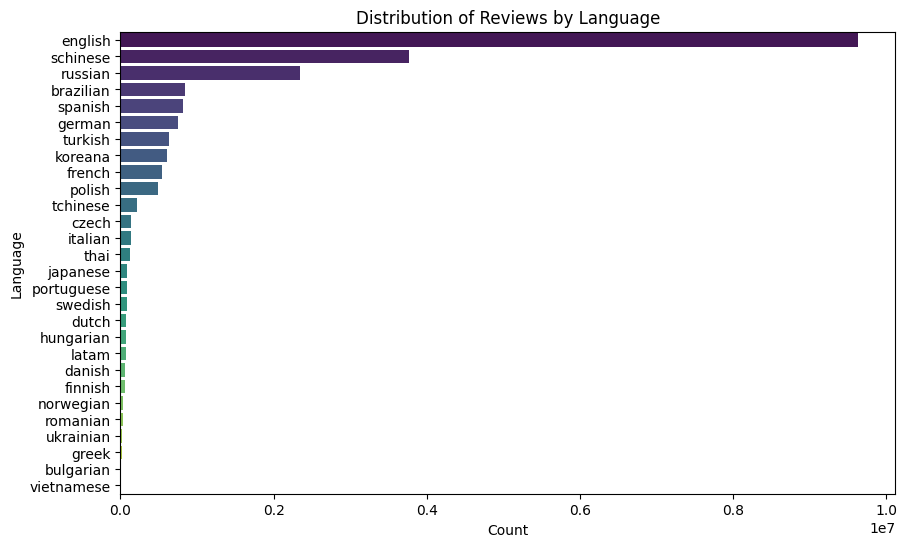

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/1401491989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='recommended', palette="magma")


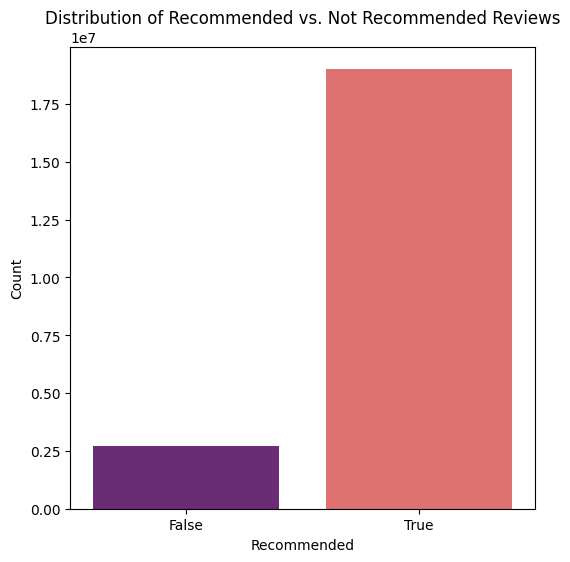

In [10]:
# Plot the distribution of reviews by language
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='language', order=df['language'].value_counts().index, palette="viridis")
plt.title("Distribution of Reviews by Language")
plt.xlabel("Count")
plt.ylabel("Language")
plt.show()

# Plot the distribution of recommended vs. not recommended reviews
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='recommended', palette="magma")
plt.title("Distribution of Recommended vs. Not Recommended Reviews")
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.show()

# -------------------------------------------
#### Part 5: Correlation Analysis
# -------------------------------------------


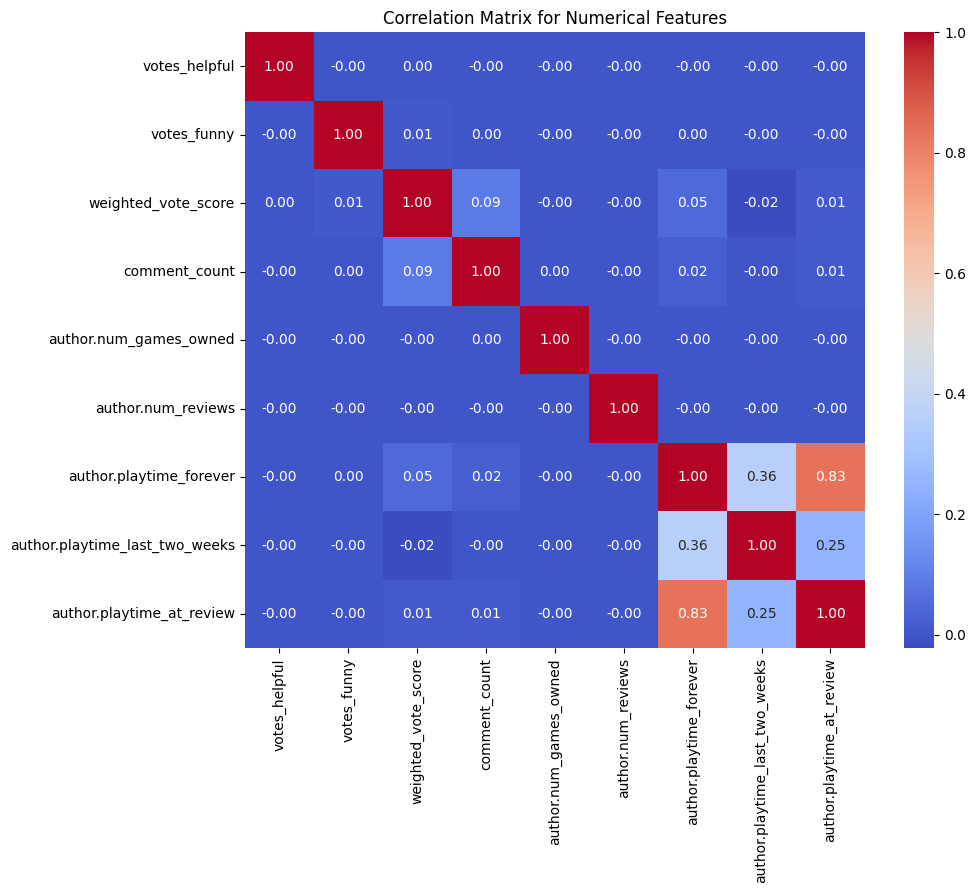

In [11]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

# -------------------------------------------
# Part 6: Outliers and Anomalies
# -------------------------------------------

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2881643406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2881643406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2881643406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Set3")
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2881643406.py:5: 

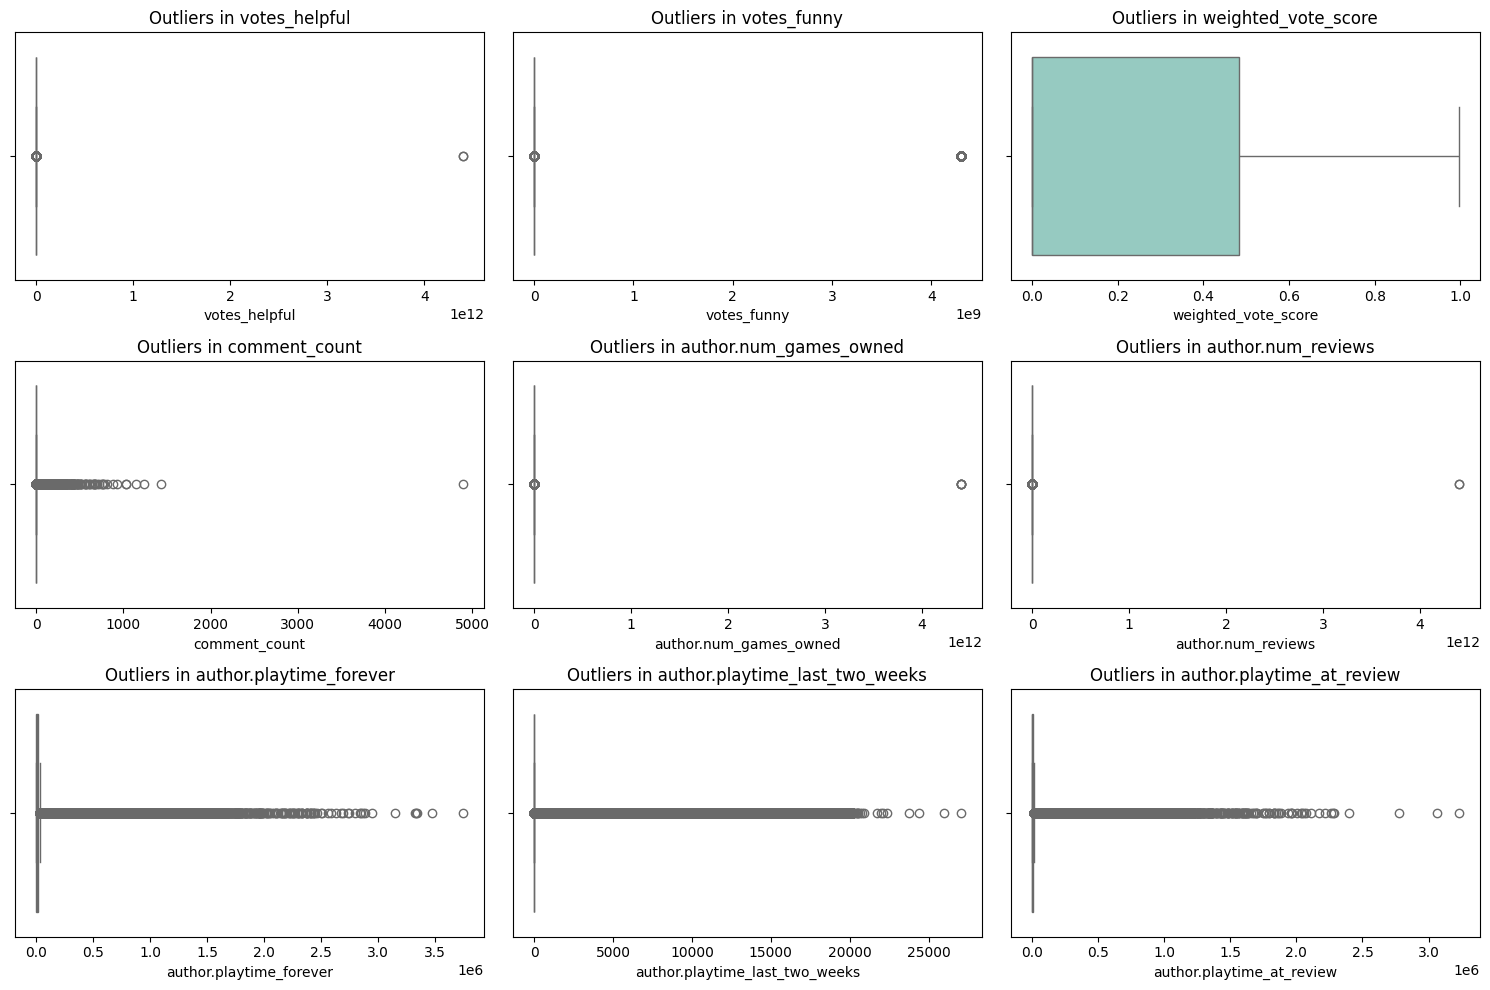

In [12]:
# Boxplot to identify outliers in selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], palette="Set3")
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

Top 10 Reviewers by Review Count:
            author.steamid  review_count
2409169  76561198062813911           149
7571900  76561198315585536           132
5773563  76561198192166873           107
6348755  76561198239163744           106
1849199  76561198045381877           103
2478679  76561198064946151           100
960101   76561198013146396            99
1329539  76561198027973295            96
128759   76561197969749884            88
425671   76561197989746995            86


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2146172440.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_percentage.index, y=language_percentage.values, palette="viridis")


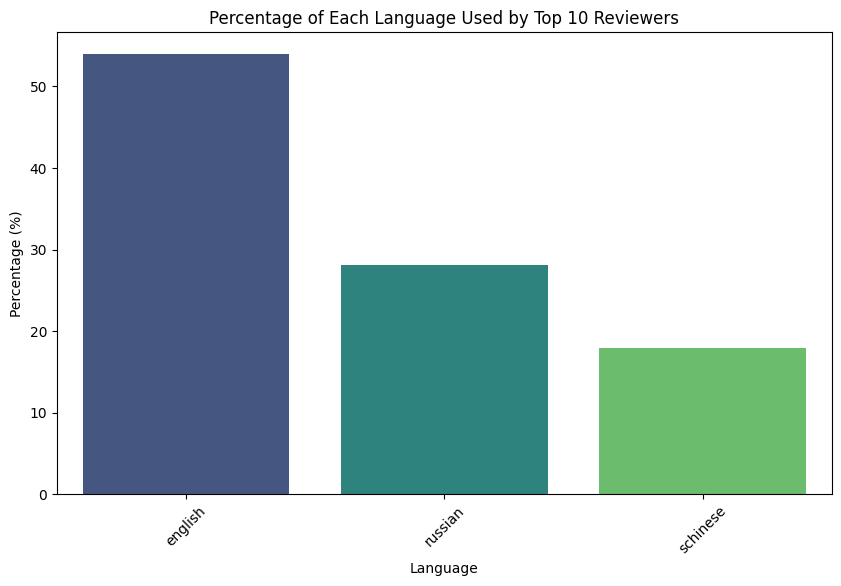


Top Reviewers with Average Helpful Votes:
      author.steamid  review_count  average_helpful_votes
0  76561198062813911           149               0.885906
1  76561198315585536           132              49.712121
2  76561198192166873           107              38.897196
3  76561198239163744           106               7.641509
4  76561198045381877           103               2.252427
5  76561198064946151           100               3.990000
6  76561198013146396            99               0.969697
7  76561198027973295            96              11.802083
8  76561197969749884            88              26.238636
9  76561197989746995            86              21.058140


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2146172440.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='author.steamid', y='average_helpful_votes', data=top_reviewers_with_votes, palette="magma")


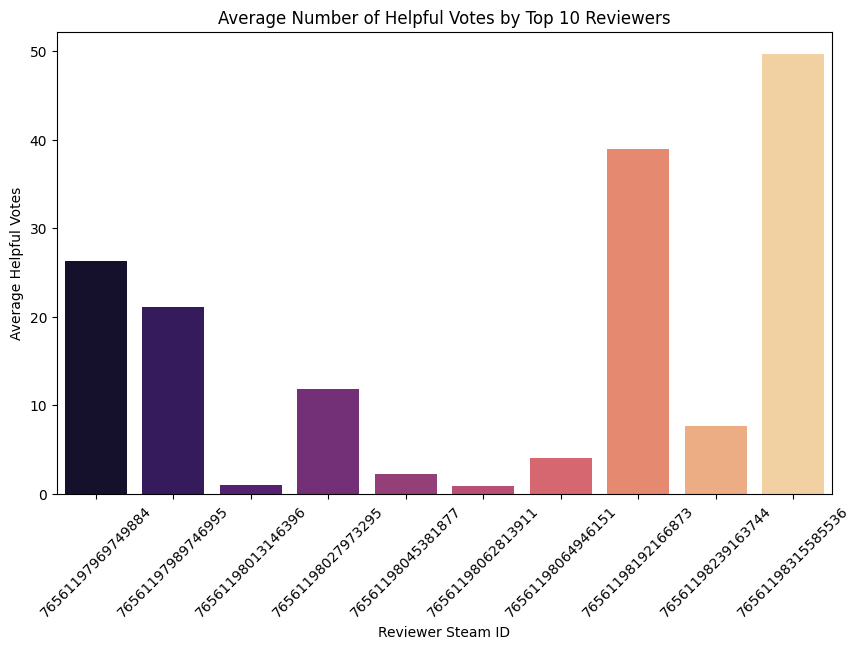

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2146172440.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', y='app_name', data=app_review_distribution, palette="crest")


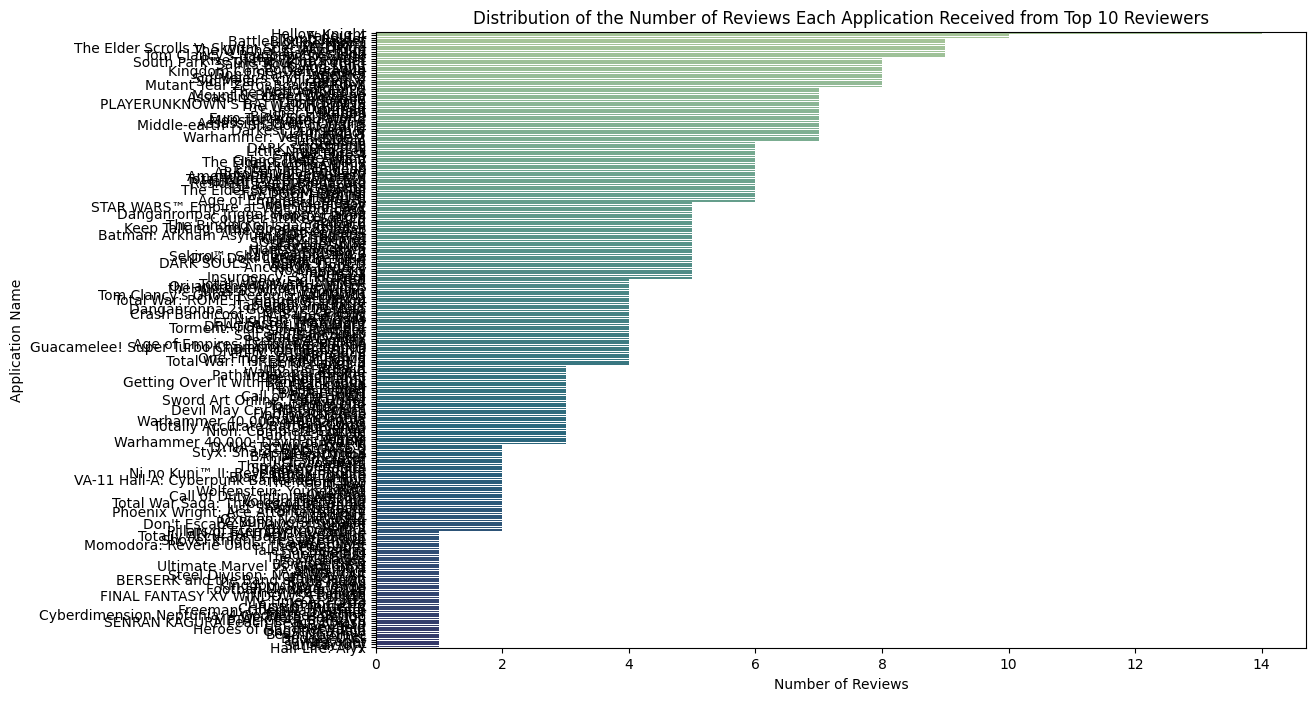

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `cleaned_df` is the cleaned dataset after performing the EDA

# -------------------------------------------
# Part 1: Identify the Top 10 Reviewers by Review Count
# -------------------------------------------

def get_top_reviewers(df):
    top_reviewers = (
        df.groupby('author.steamid')
        .size()
        .reset_index(name='review_count')
        .sort_values(by='review_count', ascending=False)
        .head(10)
    )
    return top_reviewers

top_reviewers = get_top_reviewers(df)

# Display the top 10 reviewers
print("Top 10 Reviewers by Review Count:")
print(top_reviewers)

# Filter reviews from the top 10 reviewers
top_reviewer_ids = top_reviewers['author.steamid']
top_reviews = df[df['author.steamid'].isin(top_reviewer_ids)]

# -------------------------------------------
# Part 2: Calculate the Percentage of Each Language Used by Top 10 Reviewers
# -------------------------------------------

# Calculate the percentage of each language used by these top reviewers
language_percentage = top_reviews['language'].value_counts(normalize=True) * 100

# Plot the language usage distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=language_percentage.index, y=language_percentage.values, palette="viridis")
plt.title("Percentage of Each Language Used by Top 10 Reviewers")
plt.xlabel("Language")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------
# Part 3: Calculate the Average Number of Helpful Votes for Top 10 Reviewers
# -------------------------------------------

# Calculate the average number of helpful votes each top reviewer received
average_helpful_votes = top_reviews.groupby('author.steamid')['votes_helpful'].mean().reset_index()
average_helpful_votes.columns = ['author.steamid', 'average_helpful_votes']

# Merge with the top reviewers data for comparison
top_reviewers_with_votes = top_reviewers.merge(average_helpful_votes, on='author.steamid')

# Display top reviewers with their average helpful votes
print("\nTop Reviewers with Average Helpful Votes:")
print(top_reviewers_with_votes)

# Plot the average helpful votes for each top reviewer
plt.figure(figsize=(10, 6))
sns.barplot(x='author.steamid', y='average_helpful_votes', data=top_reviewers_with_votes, palette="magma")
plt.title("Average Number of Helpful Votes by Top 10 Reviewers")
plt.xlabel("Reviewer Steam ID")
plt.ylabel("Average Helpful Votes")
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------
# Part 4: Distribution of the Number of Reviews Each Application Received from the Top 10 Reviewers
# -------------------------------------------

# Count the number of reviews for each application from the top 10 reviewers
app_review_distribution = top_reviews['app_name'].value_counts().reset_index()
app_review_distribution.columns = ['app_name', 'review_count']

# Plot the application review distribution in descending order
plt.figure(figsize=(12, 8))
sns.barplot(x='review_count', y='app_name', data=app_review_distribution, palette="crest")
plt.title("Distribution of the Number of Reviews Each Application Received from Top 10 Reviewers")
plt.xlabel("Number of Reviews")
plt.ylabel("Application Name")
plt.show()


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_20647/2439581952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', y='app_name', data=app_review_distribution, palette="crest")


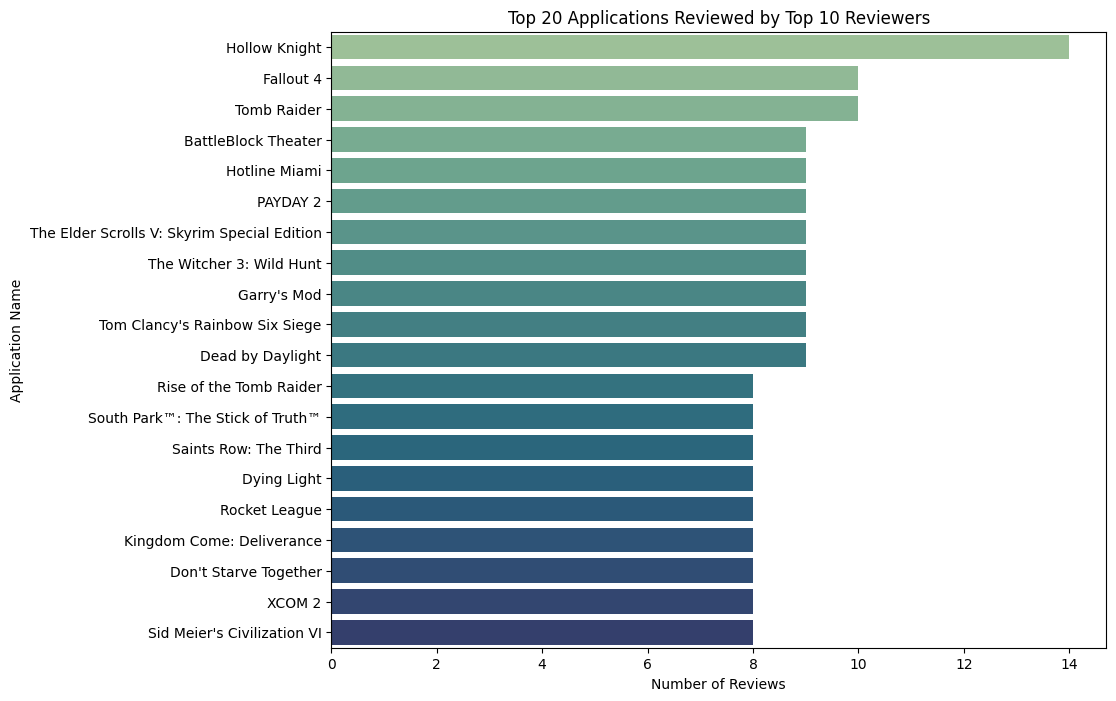

In [15]:
# Limit to top 20 applications by review count for readability
top_n = 20
app_review_distribution = app_review_distribution.head(top_n)

# Plot the application review distribution with improved formatting
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.barplot(x='review_count', y='app_name', data=app_review_distribution, palette="crest")
plt.title("Top 20 Applications Reviewed by Top 10 Reviewers")
plt.xlabel("Number of Reviews")
plt.ylabel("Application Name")
plt.xticks(rotation=0)  # Keep x-ticks horizontal
plt.show()
